In [1]:
# Install the required libraries
!pip install prophet

Libraries successfully installed


In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

import hvplot.pandas

%matplotlib inline

In [3]:
# Upload the scarf-google-trends-data.csv file
from google.colab import files
uploaded = files.upload()

Saving scarf-google-trends-data.csv to scarf-google-trends-data.csv


In [3]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
df_alpaca = pd.read_csv("../Resources/scarf-google-trends-data.csv")

# Review the DataFrame
df_alpaca.head()

,week,canada,uruguay
0,11/8/15,74,17
1,11/15/15,81,17
2,11/22/15,94,17
3,11/29/15,92,0
4,12/6/15,87,18


In [4]:
# Plot the general trends
df_alpaca.hvplot() 

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [5]:
# Create a DataFrame for Canada to include the week and canada columns
df_canada = df_alpaca[["week", "canada"]]

# Rename the columns to the Prophet model syntax 
df_canada = df_canada.rename(columns={"week":"ds", "canada":"y"})

# Review the Canada DataFrame
df_canada.head()

,ds,y
0,11/8/15,74
1,11/15/15,81
2,11/22/15,94
3,11/29/15,92
4,12/6/15,87


In [6]:
# Create a DataFrame for Uruguay to include the week and uruguay columns
df_uruguay = df_alpaca[["week", "uruguay"]]

# Rename the columns to the Prophet model syntax 
df_uruguay = df_uruguay.rename(columns={"week":"ds", "uruguay":"y"})

# Review the Uruguay DataFrame
df_uruguay.head()

,ds,y
0,11/8/15,17
1,11/15/15,17
2,11/22/15,17
3,11/29/15,0
4,12/6/15,18


In [7]:
# Create a Prophet model for Canada
model_canada = Prophet()

In [8]:
# Create a Prophet model for Uruguay
model_uruguay = Prophet()

In [9]:
# Fit the Canada Prophet model
model_canada.fit(df_canada)

/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1124: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:271: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
18:28:34 - cmdstanpy - INFO - Chain [1] start processing
18:28:34 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Fit the Uruguay Prophet model
model_uruguay.fit(df_uruguay)

/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1124: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:271: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
18:28:35 - cmdstanpy - INFO - Chain [1] start processing
18:28:35 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# Forecast one year of weekly future trends data for Canada 
future_canada = model_canada.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_canada DataFrame
future_canada.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


In [12]:
# Forecast one year of weekly future trends data for Uruguay 
future_uruguay = model_uruguay.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_uruguay DataFrame
future_uruguay.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


In [13]:
# Make predictions for Canada using the future_canada DataFrame
forecast_canada = model_canada.predict(future_canada)

# Display the first five rows of the forecast_canada DataFrame
forecast_canada.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.048900,68.710390,80.960144,46.048900,46.048900,28.558510,28.558510,28.558510,28.558510,28.558510,28.558510,0.0,0.0,0.0,74.607410
1,2015-11-15,45.952729,71.928119,85.144686,45.952729,45.952729,32.944876,32.944876,32.944876,32.944876,32.944876,32.944876,0.0,0.0,0.0,78.897605
2,2015-11-22,45.856557,75.830365,87.901774,45.856557,45.856557,36.024436,36.024436,36.024436,36.024436,36.024436,36.024436,0.0,0.0,0.0,81.880993
3,2015-11-29,45.760386,78.523636,90.963345,45.760386,45.760386,38.863751,38.863751,38.863751,38.863751,38.863751,38.863751,0.0,0.0,0.0,84.624137
4,2015-12-06,45.664214,81.170557,93.410021,45.664214,45.664214,41.701955,41.701955,41.701955,41.701955,41.701955,41.701955,0.0,0.0,0.0,87.366169


In [14]:
# Make predictions for Uruguay using the future_uruguay DataFrame
forecast_uruguay = model_uruguay.predict(future_uruguay)

# Display the first five rows of the forecast_uruguay DataFrame
forecast_uruguay.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,33.346600,9.165171,44.089027,33.346600,33.346600,-7.082842,-7.082842,-7.082842,-7.082842,-7.082842,-7.082842,0.0,0.0,0.0,26.263758
1,2015-11-15,33.301427,6.873808,40.784242,33.301427,33.301427,-10.347929,-10.347929,-10.347929,-10.347929,-10.347929,-10.347929,0.0,0.0,0.0,22.953498
2,2015-11-22,33.256253,-0.515886,35.791892,33.256253,33.256253,-15.895338,-15.895338,-15.895338,-15.895338,-15.895338,-15.895338,0.0,0.0,0.0,17.360915
3,2015-11-29,33.211080,-1.698566,31.359420,33.211080,33.211080,-19.477105,-19.477105,-19.477105,-19.477105,-19.477105,-19.477105,0.0,0.0,0.0,13.733975
4,2015-12-06,33.165907,-2.415872,31.430939,33.165907,33.165907,-18.472699,-18.472699,-18.472699,-18.472699,-18.472699,-18.472699,0.0,0.0,0.0,14.693208


/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


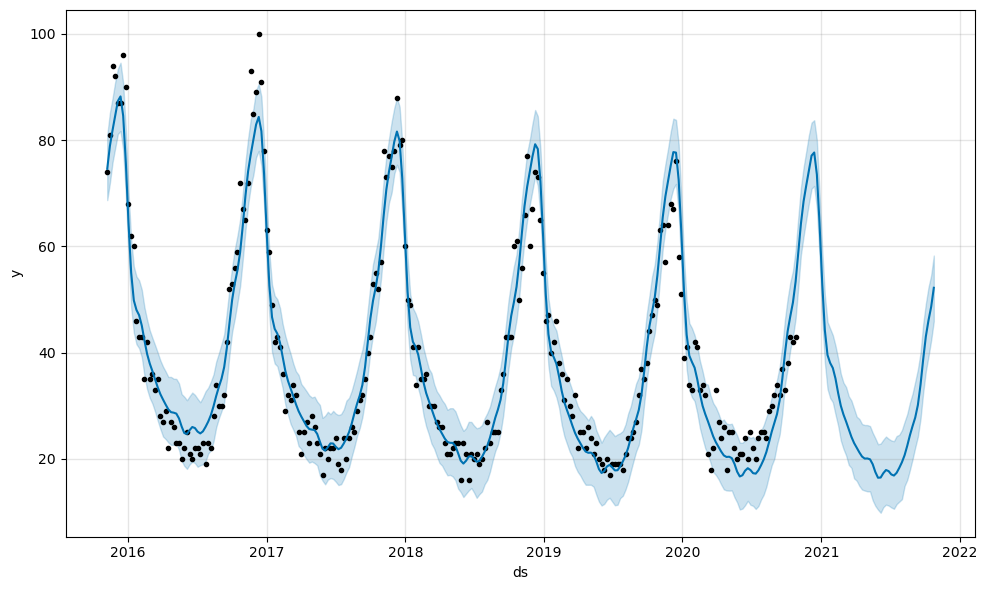

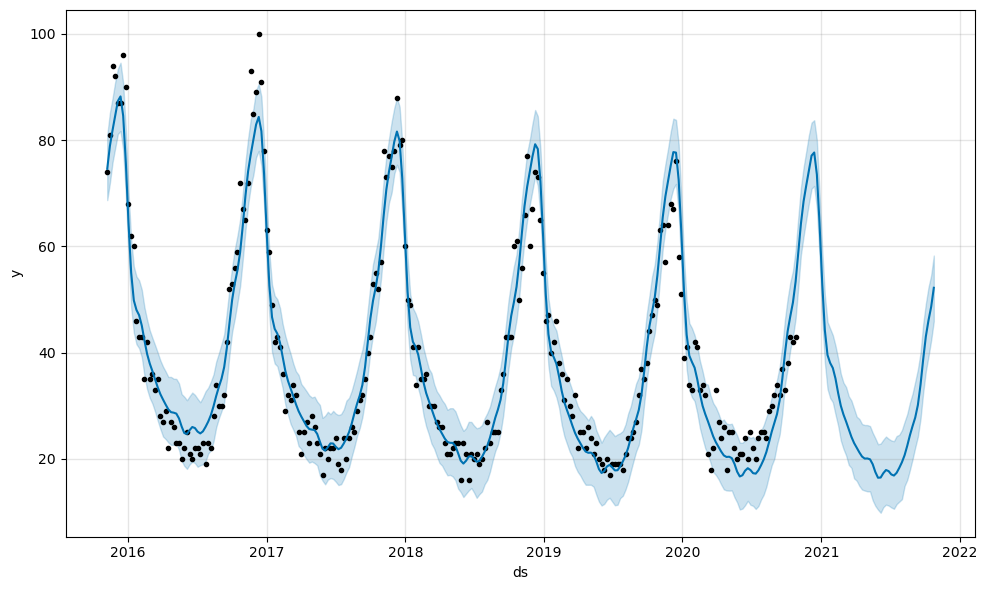

In [15]:
# Plot the Prophet predictions for Canada 
model_canada.plot(forecast_canada)

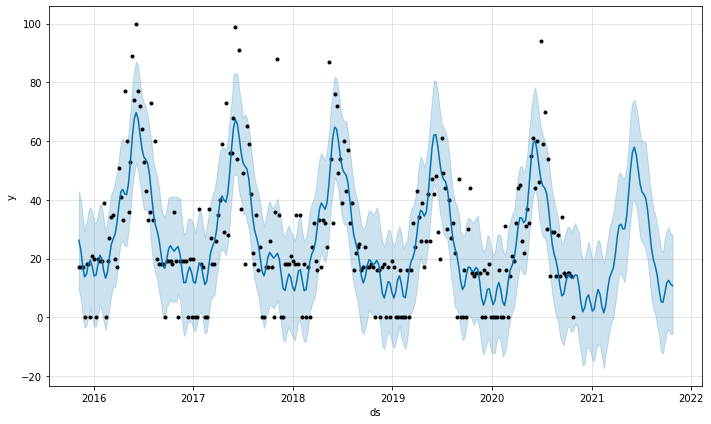

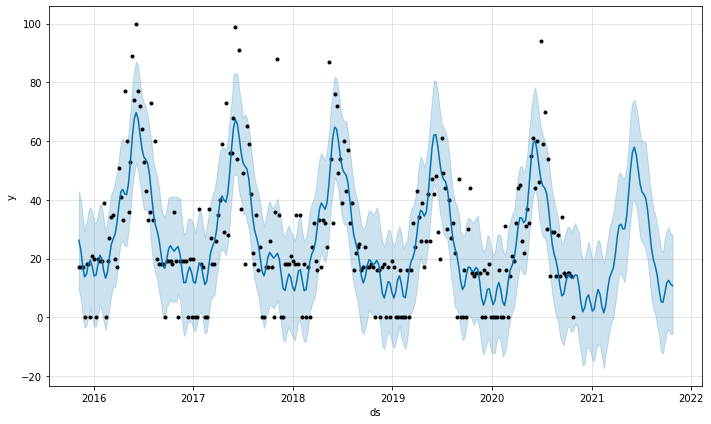

In [17]:
# Plot the Prophet predictions for Uruguay 
model_uruguay.plot(forecast_uruguay)

In [16]:
# Set the index in the forecast_canada DataFrame to the ds datetime column 
forecast_canada = forecast_canada.set_index('ds')

# Display the forecast_canada DataFrame
forecast_canada.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,46.048900,68.710390,80.960144,46.048900,46.048900,28.558510,28.558510,28.558510,28.558510,28.558510,28.558510,0.0,0.0,0.0,74.607410
2015-11-15,45.952729,71.928119,85.144686,45.952729,45.952729,32.944876,32.944876,32.944876,32.944876,32.944876,32.944876,0.0,0.0,0.0,78.897605
2015-11-22,45.856557,75.830365,87.901774,45.856557,45.856557,36.024436,36.024436,36.024436,36.024436,36.024436,36.024436,0.0,0.0,0.0,81.880993
2015-11-29,45.760386,78.523636,90.963345,45.760386,45.760386,38.863751,38.863751,38.863751,38.863751,38.863751,38.863751,0.0,0.0,0.0,84.624137
2015-12-06,45.664214,81.170557,93.410021,45.664214,45.664214,41.701955,41.701955,41.701955,41.701955,41.701955,41.701955,0.0,0.0,0.0,87.366169


<Axes: xlabel='ds'>

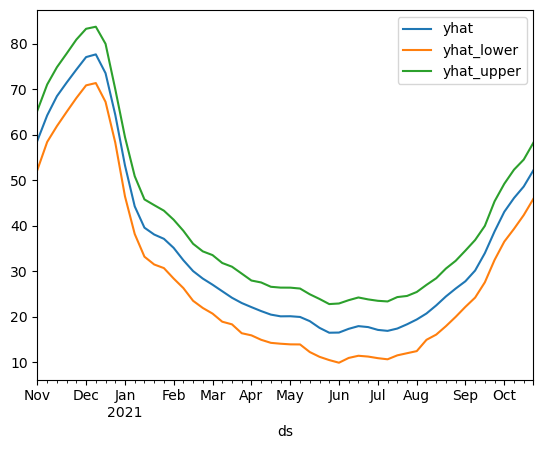

In [17]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period 
forecast_canada[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

In [18]:
# Set the index in the forecast_uruguay DataFrame to the ds datetime column 
forecast_uruguay = forecast_uruguay.set_index('ds')

# Display the forecast_uruguay DataFrame
forecast_uruguay.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,33.346600,9.165171,44.089027,33.346600,33.346600,-7.082842,-7.082842,-7.082842,-7.082842,-7.082842,-7.082842,0.0,0.0,0.0,26.263758
2015-11-15,33.301427,6.873808,40.784242,33.301427,33.301427,-10.347929,-10.347929,-10.347929,-10.347929,-10.347929,-10.347929,0.0,0.0,0.0,22.953498
2015-11-22,33.256253,-0.515886,35.791892,33.256253,33.256253,-15.895338,-15.895338,-15.895338,-15.895338,-15.895338,-15.895338,0.0,0.0,0.0,17.360915
2015-11-29,33.211080,-1.698566,31.359420,33.211080,33.211080,-19.477105,-19.477105,-19.477105,-19.477105,-19.477105,-19.477105,0.0,0.0,0.0,13.733975
2015-12-06,33.165907,-2.415872,31.430939,33.165907,33.165907,-18.472699,-18.472699,-18.472699,-18.472699,-18.472699,-18.472699,0.0,0.0,0.0,14.693208


<Axes: xlabel='ds'>

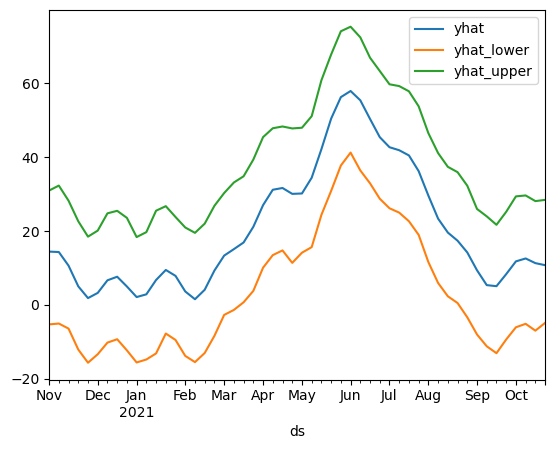

In [19]:
# Plot predictions for our forecast_uruguay DataFrame for the 52 week period 
forecast_uruguay[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-52:,:].plot()

/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

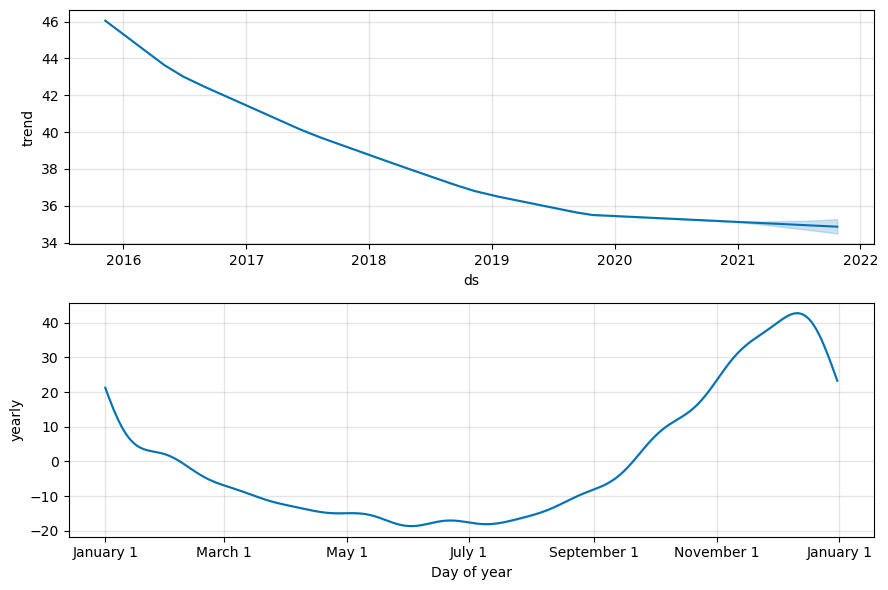

In [21]:
# Reset the index in the forecast_canada DataFrame
forecast_canada = forecast_canada.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame
fig_canada = model_canada.plot_components(forecast_canada)

/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/bradleywise/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

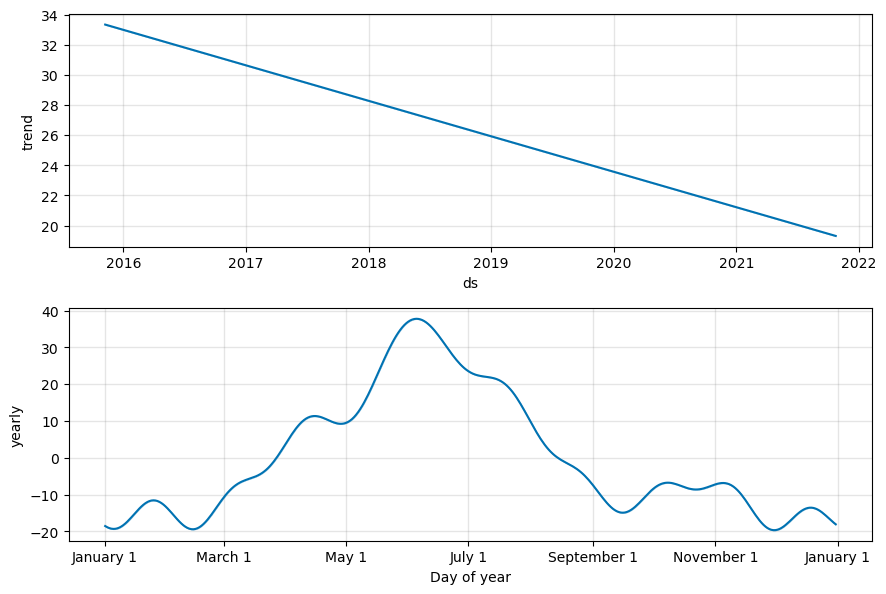

In [22]:
# Reset the index in the forecast_uruguay DataFrame
forecast_uruguay = forecast_uruguay.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_uruguay DataFrame
fig_uruguay = model_uruguay.plot_components(forecast_uruguay)